model: SVM

y_value: hp

pre processing: 灰階 -> resize -> HOG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm.notebook import tqdm

import cv2
from skimage import data, color, feature

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [2]:
def load_img(path, csv_path):
    df = pd.read_csv(csv_path)
    img_list = df['image'].tolist()
    img_data_list = []
    index = 0
    for item in tqdm(img_list):
        img_path = path + item
        img = cv2.imread(img_path)
        '''
        if index is 0:
            plt.imshow(img)
            plt.title('origin image')
            plt.show()
        '''
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(img, (89, 109), interpolation=cv2.INTER_AREA)
        '''
        fd, hog_image = feature.hog(gray, visualize=True)
        if index is 0:
            plt.imshow(hog_image)
            plt.title('hog image')
            plt.show()
            index += 1
        img_data_list.append(hog_image.flatten())
        '''
        img_data_list.append(gray.flatten())
    return img_data_list

In [3]:
csv_path = "all_records.csv"
df = pd.read_csv(csv_path)
print(df.head)
img_info = load_img("./all_images/static/img/need_scored/", csv_path)

<bound method NDFrame.head of       name                image  hp  pa  ma  sp  cr
0     shih  nba_players_290.png  10   7   3   9   8
1     shih           032621.jpg   4   5   8   9   7
2     shih  nba_players_429.png   6   5   6   7   5
3     liao           090899.jpg   5   4   7   4   4
4     liao           095790.jpg   6   5   5   3   7
...    ...                  ...  ..  ..  ..  ..  ..
1687  shih           181096.jpg   7   8   3   7   6
1688  shih           070158.jpg   5   3   4   3   4
1689  shih           182295.jpg   3   1   4   3   1
1690  shih           145346.jpg   3   2   4   3   2
1691  shih           131518.jpg   7   6   5   6   5

[1692 rows x 7 columns]>


In [4]:
print(img_info[0].shape)

(29103,)


In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(img_info, df['hp'], test_size=0.3,random_state=109)
X_train2, X_test2, y_train2, y_test2 = train_test_split(img_info, df['pa'], test_size=0.3,random_state=109)
X_train3, X_test3, y_train3, y_test3 = train_test_split(img_info, df['ma'], test_size=0.3,random_state=109)
X_train4, X_test4, y_train4, y_test4 = train_test_split(img_info, df['sp'], test_size=0.3,random_state=109)
X_train5, X_test5, y_train5, y_test5 = train_test_split(img_info, df['cr'], test_size=0.3,random_state=109)

In [6]:
def clf_testing(X, y, X_train, X_test, y_train, y_test):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)

    print(clf.score(X_train,y_train))
    print(clf.score(X_test, y_test))
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    y_pred = cross_val_predict(clf, X, y, cv=3)
    print(cross_val_score(clf, X, y, cv = 3))
    sn.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d")
    plt.show()

0.4594594594594595
0.1968503937007874


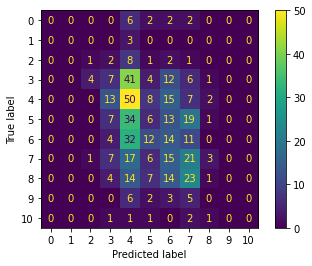

[0.17730496 0.20744681 0.18617021]


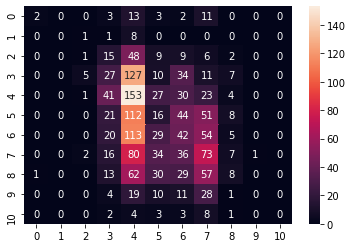

In [7]:
clf_testing(img_info, df['hp'], X_train1, X_test1, y_train1, y_test1)

0.4670608108108108
0.2440944881889764


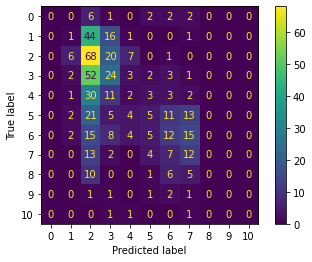

[0.20567376 0.22340426 0.2464539 ]


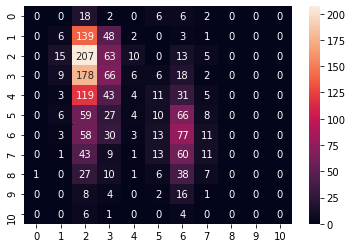

In [8]:
clf_testing(img_info, df['pa'], X_train2, X_test2, y_train2, y_test2)

0.43665540540540543
0.23622047244094488


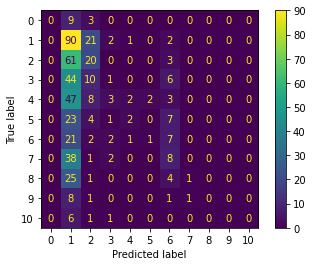

[0.2322695  0.21276596 0.23758865]


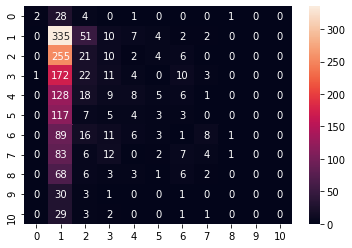

In [9]:
clf_testing(img_info, df['ma'], X_train3, X_test3, y_train3, y_test3)

0.4501689189189189
0.18503937007874016


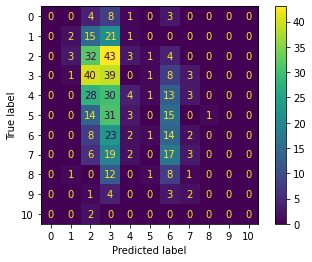

[0.20921986 0.19680851 0.21453901]


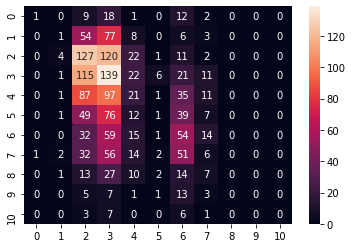

In [10]:
clf_testing(img_info, df['sp'], X_train4, X_test4, y_train4, y_test4)

0.4560810810810811
0.19488188976377951


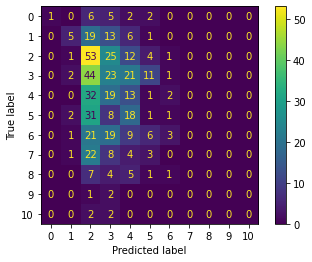

[0.16312057 0.17730496 0.16843972]


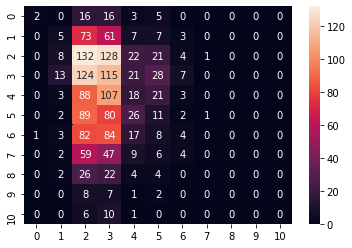

In [11]:
clf_testing(img_info, df['cr'], X_train5, X_test5, y_train5, y_test5)